C:\Users\mobiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mobiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\mobiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mobiz\AppData\Local\Packages\PythonSoft

Mean Squared Error (MSE) of ETS Forecast on Test Set: 17981304.38


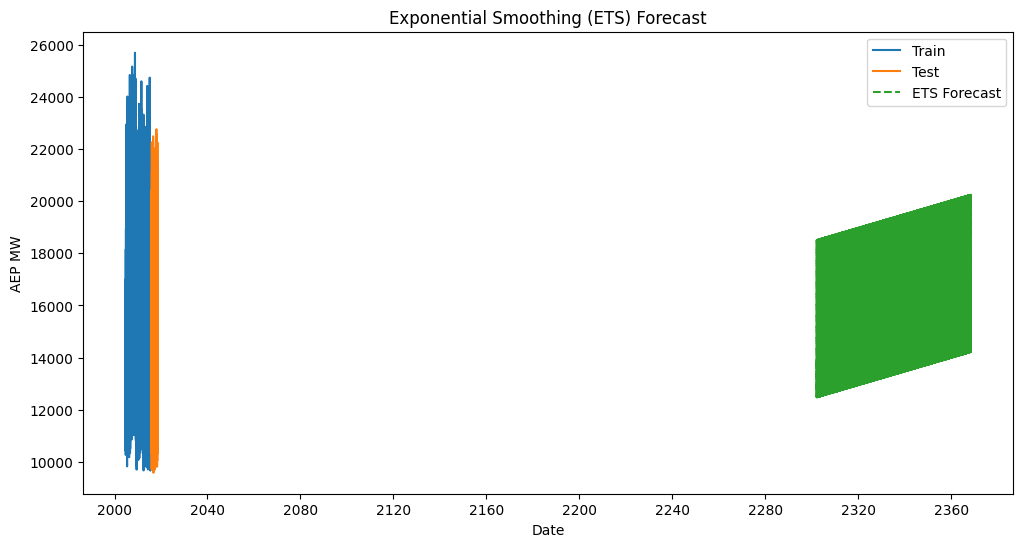

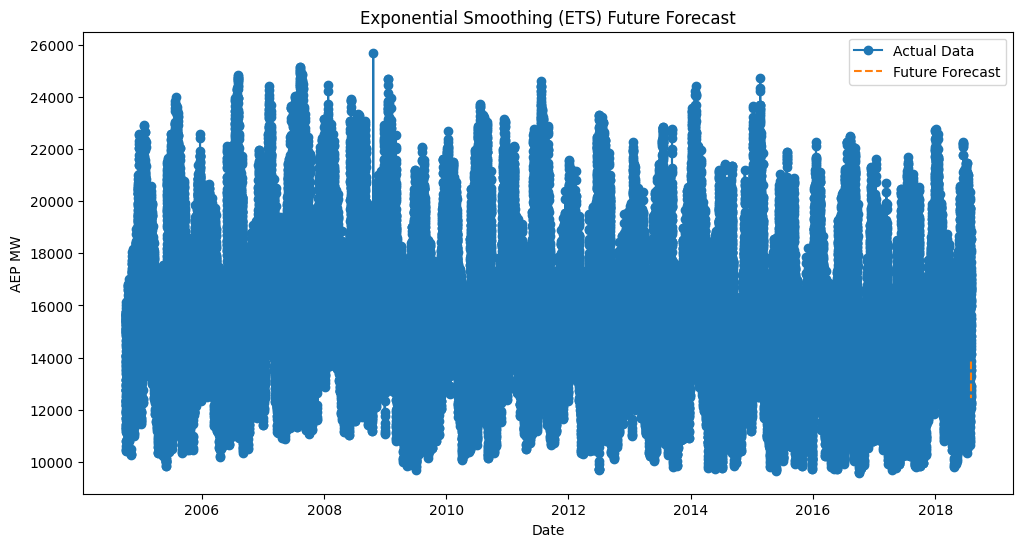

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the dataset (replace 'your_dataset.csv' with your actual dataset path)
df = pd.read_csv('AEP_hourly.csv')


# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)


# Define and fit the ETS model
ets_model = ExponentialSmoothing(df['AEP_MW'], seasonal_periods=24, trend='add', seasonal='add')
ets_results = ets_model.fit()

# Forecast using the trained ETS model
future_steps = 5  # Number of future steps to forecast
ets_forecast = ets_results.forecast(steps=future_steps)

# Generate future datetime index for the forecast
last_datetime = df.index[-1]
future_index = pd.date_range(start=last_datetime, periods=future_steps+1, freq='H')[1:]

# Evaluate the forecast using mean squared error (MSE)
# For demonstration, we can split the data into train and test sets and evaluate on the test set
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
test_forecast = ets_results.forecast(len(test))

mse = mean_squared_error(test['AEP_MW'], test_forecast)
print(f"Mean Squared Error (MSE) of ETS Forecast on Test Set: {mse:.2f}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['AEP_MW'], label='Train')
plt.plot(test.index, test['AEP_MW'], label='Test')
plt.plot(test_forecast.index, test_forecast, label='ETS Forecast', linestyle='--')
plt.title('Exponential Smoothing (ETS) Forecast')
plt.xlabel('Date')
plt.ylabel('AEP MW')
plt.legend()
plt.show()

# Plot the forecasted future values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AEP_MW'], label='Actual Data', marker='o')
plt.plot(future_index, ets_forecast, label='Future Forecast', linestyle='--')
plt.title('Exponential Smoothing (ETS) Future Forecast')
plt.xlabel('Date')
plt.ylabel('AEP MW')
plt.legend()
plt.show()
